In [305]:
K = Link([[1,11,2,10],[3,8,4,9],[5,2,6,3],[7,1,8,12],[9,4,10,5],[11,7,12,6]]) #see lecture 5-3

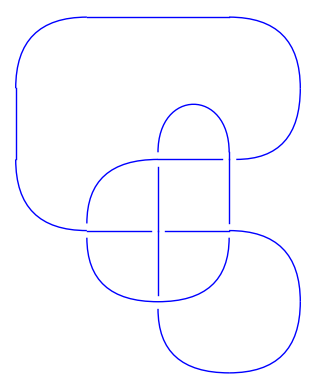

In [306]:
K.plot()

In [308]:
PD = K.pd_code() ; PD #this is the Plane Diagram diagram code we use (it is a Python list of lists)

[[1, 11, 2, 10],
 [3, 8, 4, 9],
 [5, 2, 6, 3],
 [7, 1, 8, 12],
 [9, 4, 10, 5],
 [11, 7, 12, 6]]

In [196]:
positive_splittings = []
negative_splittings = []
for i in range(len(PD)):
    positive_splittings.append([ [PD[i][0],PD[i][1]], [PD[i][2], PD[i][3]] ])
    negative_splittings.append([ [PD[i][1], PD[i][2]], [PD[i][3], PD[i][0]] ])

In [309]:
positive_splittings[0], positive_splittings[1] #each of the six cuadruples is divided into 2 ways

([[1, 11], [2, 10]], [[3, 8], [4, 9]])

In [310]:
ps = []
ns = []
states = []
for p in powerset(range(len(PD))):
    n = [i for i in range(len(PD)) if i not in p]
    pos_pairs = [x for j in p for x in positive_splittings[j]]
    neg_pairs = [x for j in n for x in negative_splittings[j]]
    ps.append(pos_pairs)
    ns.append(neg_pairs)
    states.append(pos_pairs+neg_pairs)

In [311]:
len(states) #each element of states is a list of 12 pairs corresponding to a final state

64

In [312]:
states[53] #for example

[[1, 11],
 [2, 10],
 [5, 2],
 [6, 3],
 [9, 4],
 [10, 5],
 [11, 7],
 [12, 6],
 [8, 4],
 [9, 3],
 [1, 8],
 [12, 7]]

In [201]:
power_set = []
for p in powerset(range(len(PD))):
    power_set.append(p)

In [314]:
power_set[53] 

[0, 2, 4, 5]

In [315]:
len(power_set[53]) #this is the number of positive splittings involved in states[53]

4

In [316]:
A = var('A') #this is the variable we use in the Kauffman bracket

In [317]:
f = (A^(1/2)+1)*(A^(1/2)-1) + 1 #example

In [318]:
f.simplify_full() 

A

In [319]:
def loops(L):
    loops = []
    for i in range(len(L)):
        m = L[i]
        while True:
            pairs = [x for x in L if len(set(m).intersection(x))>0]
            m = [n for p in pairs for n in p]
            if all(m.count(i) == 2 for i in m):
                break
        loops.append(m)
    return(len(set(map(tuple, loops))))

In [320]:
loops(states[53]) #the function loops counts the number of circles in a final state

2

In [321]:
bracket = 0
for i in range(len(states)):
    np = len(power_set[i])
    nn = len(PD) - len(power_set[i])
    bracket = bracket + A^(np)*A^(-nn)*(-A^2-A^(-2))^(loops(states[i])-1)
print(bracket.simplify_full())

-(A^24 - 2*A^20 + 2*A^16 - 3*A^12 + 2*A^8 - 2*A^4 + 1)/A^12


This is agrees with the lectures